In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit_aer import AerProvider
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime.fake_provider import FakeSantiagoV2

# 4 - Qiskit Simulators

## Exercise 1

Develop a simple circuit with (at least) the following characteristics:

- Width: 4
- Depth: 5
- Size: 10

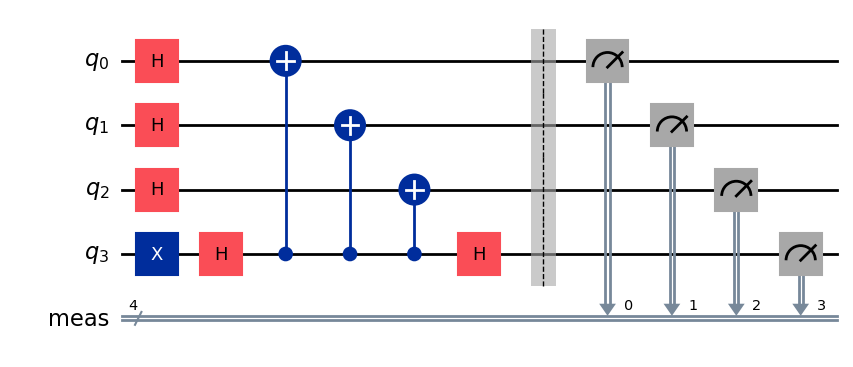

Width: 8
Depth: 7
Size: 13


In [2]:
qc = QuantumCircuit(4)

qc.x(3)
qc.h(range(4))
qc.cx(3, range(3))
qc.h(3)
qc.measure_all()

display(qc.draw(output="mpl"))

print("Width: " + str(qc.width()))
print("Depth: " + str(qc.depth()))
print("Size: " + str(qc.size()))

## Exercise 2

Execute the circuit with the following providers. For each one, obtain its resulting histogram and comment on the obtained results:
      
- BasicProvider
- Aer (aer_simulator)
- A random FakeProvider

- `BasicProvider`


/tmp/ipykernel_38075/407076781.py:3: UserWarning: Option nshots is not used by this backend
  result = backend.run(qc, nshots=5_000).result()


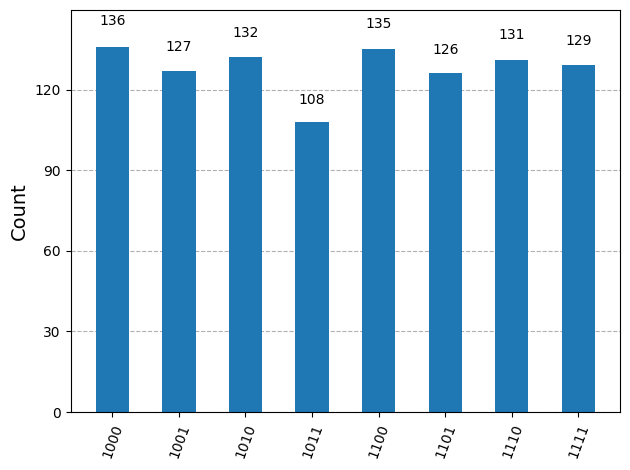

In [3]:
backend = BasicProvider().get_backend("basic_simulator")

result = backend.run(qc, nshots=5_000).result()
counts = result.get_counts()

plot_histogram(counts)

Lo primero que llama la atención es que `BasicSimulator` no soporta la opción `nshots` (de ahí el warning). Esto significa que no realiza una simulación basada en el muestreo de un número de mediciones, sino que calcula el resultado en una sóla ejecución.

- `Aer`, `aer_simulator`

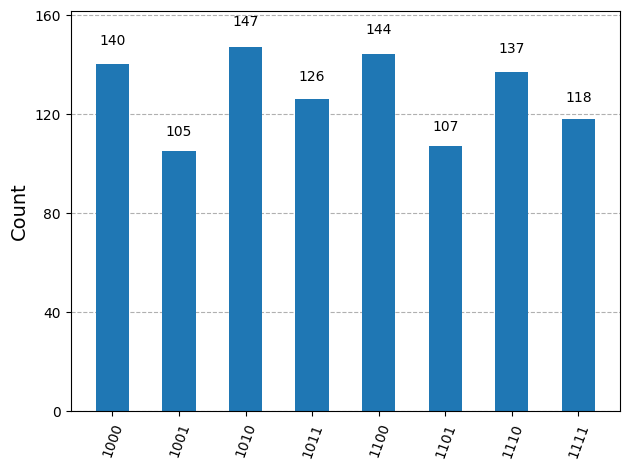

In [4]:
backend = AerProvider().get_backend("aer_simulator")

result = backend.run(qc, nshots=5_000).result()
counts = result.get_counts()

plot_histogram(counts)

En el caso del `aer_simulator`, sí que podemos utilizar `nshots`, lo que permite emular con mayor fidelidad lo que sería una ejecución en un ordenador cuántico real.

De todas maneras, aunque esta simulación pueda resultar más fiel, los resultados obtenidos son prácticamente los mismos.


 - `FakeProvider`

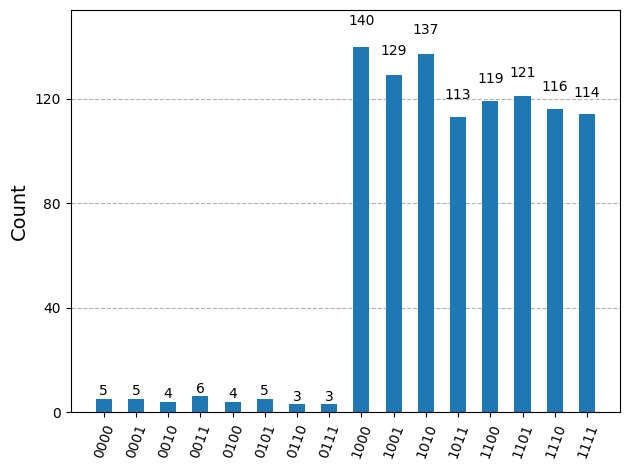

In [5]:
fake_santiago = FakeSantiagoV2()

transpiled_santiago = transpile(qc, fake_santiago)

sampler_santiago = SamplerV2(fake_santiago)

job_santiago = sampler_santiago.run([transpiled_santiago])

counts = job_santiago.result()[0].data.meas.get_counts()
plot_histogram(counts)

Para este último caso, sí que vemos que los resultados son diferentes, y es que al utilizar un fake, estamos simulando también el ruído que tiene este ordenador cuántico real, de manera que los estados cuya probabilidad es nula sí que pueden llegar a aparecer como causa de este ruído.

# Exercise 3

Use the backend aer_simulator_statevector for obtaining the statevector of the middle of the circuit. Does it reflect the final results of the histograms? Why?

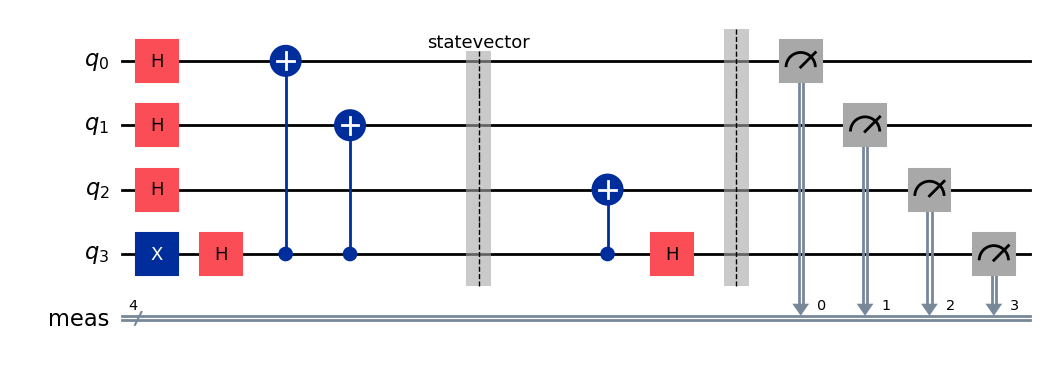

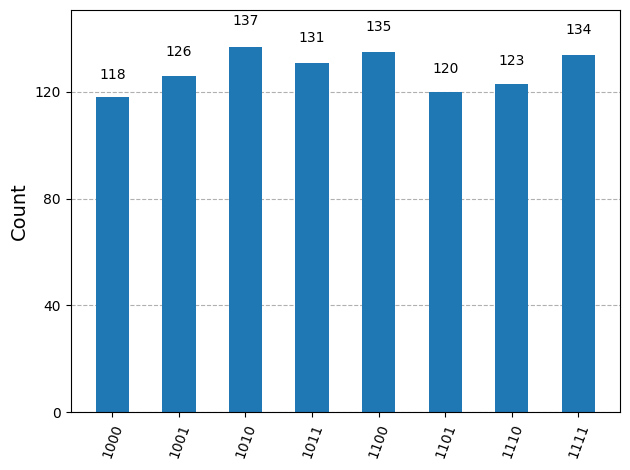

Statevector([ 0.25-3.061617e-17j,  0.25-3.061617e-17j,  0.25-3.061617e-17j,
              0.25-3.061617e-17j,  0.25-3.061617e-17j,  0.25-3.061617e-17j,
              0.25-3.061617e-17j,  0.25-3.061617e-17j, -0.25+3.061617e-17j,
             -0.25+3.061617e-17j, -0.25+3.061617e-17j, -0.25+3.061617e-17j,
             -0.25+3.061617e-17j, -0.25+3.061617e-17j, -0.25+3.061617e-17j,
             -0.25+3.061617e-17j],
            dims=(2, 2, 2, 2))


In [6]:
qc = QuantumCircuit(4)

qc.x(3)
qc.h(range(4))

qc.cx(3, 0)
qc.cx(3, 1)
qc.save_statevector()
qc.cx(3, 2)

qc.h(3)
qc.measure_all()

display(qc.draw(output="mpl"))

backend = AerProvider().get_backend("aer_simulator_statevector")

result = backend.run(qc, nshots=5_000).result()
counts = result.get_counts()

display(plot_histogram(counts))

statevector = result.get_statevector(qc)
print(statevector)

Ignorando las pequeñas partes imaginarias (que son ruido numérico), este statevector muestra que el sistema está en una superposición de 16 estados. Cada coeficiente representa la amplitud de probabilidad de un estado base específico. En este caso vemos que la probabilidad es idéntica para cada estado.

Como podemos observar, el estado obtenido en este punto no se corresponde con los resultados de las medidas, ya que tras aplicar el resto de puertas, las probabilidades de la mitad de los posibles estados se reducen a 0, mientras que el resto de estados siguien siendo equiprobables.